# 4 point data-file plotting and analysis

The aim of this script is to load in the text file containing all the analysis from the experiments performed in which dwell time vs accuracy were performed. 

In [69]:
import numpy as np
import scipy.optimize as opt 
import matplotlib.pyplot as plot
import os 
import pandas as pd

In [70]:
def load_data(file_name):
    '''Load in the data from the text file.'''
    
    data_set = pd.read_table(file_name)
    return(data_set)

In [71]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [72]:
def in_x_fit(x, A, C):
    
    y = A /(x) + C
    
    return(y)

In [73]:
def sqrt_fit(x, A, B):
    
    y = A * np.sqrt(x) + B
    
    return(y)

In [74]:
def in_sqrt(x, A, C):

    y = (A/np.sqrt(x)) + C
    
    return(y)

In [75]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

1.291487864454555 0.04806565539050289
-2.314987608447858


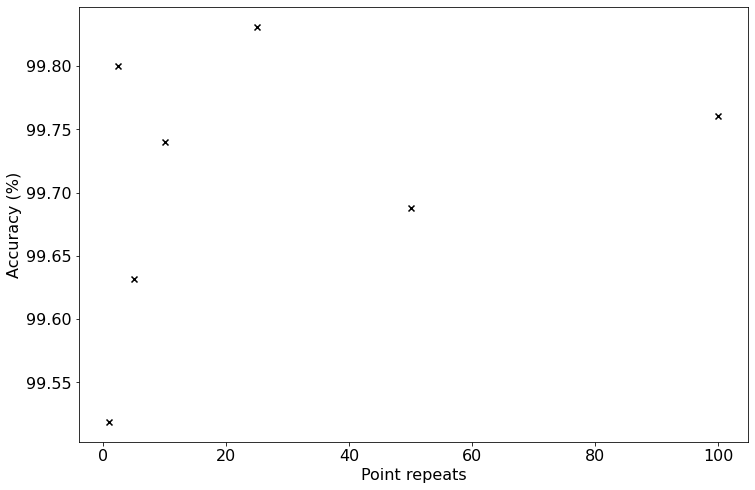

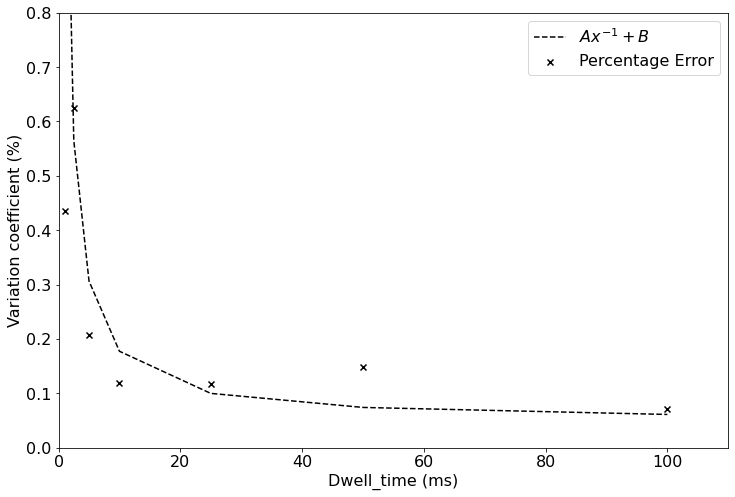

In [112]:
###### set_plot_params()
set_plot_params()
# input the date 
date = '20210921'

folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + date +'_2\\'
frequency_value = 3
file_name = date +'_Dwell_time_results_I_' + str(frequency_value)

data = load_data(folder_path + file_name + '.dat')
exp_repeats = 7

cw_intensity  = np.array([0.96696511, 0.95464444, 0.95375027, 0.96396645])

dwell_time_array = data['Dwell time (ms)']
mean_norm_intensity = data['Mean Normalised Counts (n)']
repeats_array =  data['Number of Repeats']

mean_mean_intensity = []
dwell_time = []
repeats = []
accuracy = []
precision = []

for i in range(int(len(dwell_time_array)/exp_repeats)):
    mean_mean_intensity.append(np.mean(mean_norm_intensity[i*exp_repeats : (i+1)*exp_repeats - 1]))
    precision.append(np.std(mean_norm_intensity[i*exp_repeats : (i+1)*exp_repeats - 1]))
    dwell_time.append(np.mean(dwell_time_array[i*7]))
    accuracy.append(np.sqrt(np.power(cw_intensity[frequency_value-1]-mean_mean_intensity[i],2)))
    repeats.append(np.mean(repeats_array[[i*7]]))

a = (100-100*(np.array(accuracy)/np.array(mean_mean_intensity)))

b = 100*(np.array(precision)/(mean_mean_intensity))

p0 = [1, 1000]

#acc_fit_params, confidence = opt.curve_fit(in_sqrt, dwell_time, a, p0)
#x = np.linspace(0, 101, 102)
#y1 = in_sqrt(dwell_time, acc_fit_params[0], acc_fit_params[1])
    
fig,ax = plot.subplots()
plot.scatter(dwell_time, a, marker = 'x', color = 'k') 
plot.xlabel('Point repeats')
plot.ylabel('Accuracy (%)')
#plot.title('Accuracy')
#plot.axis([0, 110, 0, 0.7])

#plot.plot(dwell_time, y1)
#r_squared = get_r_squared(dwell_time, a, y1)
#print(r_squared)

fitting_data_repeats = [dwell_time[1], dwell_time[2], dwell_time[3], 
                        dwell_time[4], dwell_time[5], dwell_time[6]]
fitting_data_precision = [b[1], b[2], b[3], b[4],
                       b[5], b[6]]

precision_fit_params, confidence = opt.curve_fit(in_x_fit, fitting_data_repeats, fitting_data_precision)# dwell_time, b, p0)
y2 = in_x_fit(dwell_time, precision_fit_params[0], precision_fit_params[1])

r_squared = get_r_squared(dwell_time, b, y2)

fig1,ax1 = plot.subplots()
plot.scatter(dwell_time, b, color = 'k', marker = 'x', label ='Percentage Error')
plot.xlabel('Dwell_time (ms)')
plot.ylabel('Variation coefficient (%)')
plot.axis([0, 110, 0, 0.8])
#plot.title('Precision')

plot.plot(dwell_time, y2, color = 'k', linestyle = '--', label = r'$A x^{-1} + B$')
plot.legend()
print(precision_fit_params[0], precision_fit_params[1])
print(r_squared)
#fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\'+ date + '\\' 
#             + 'Acurracy_measurement_I_' + str(frequency_value) + '.pdf')
fig1.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\'+ date + '_2\\' 
             + 'Precision_measurement_I_' + str(frequency_value) + '.pdf')

In [77]:
print(dwell_time)
print(accuracy)
print(y2[4])

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[0.0010536223916537413, 0.0012019393678865953, 0.0006860871573066696, 0.00023085928895816288, 0.0015195728137321618, 0.0015883002541471347, 0.0001188609750688574, 0.0012454087348879872, 0.00017695509634618745, 0.00024443002124252544]
[-6318.81813994]


In [10]:
acc = data['Accuracy of measurement |I_CW - I_4point|']
d = []
for i in range(int(len(acc)/7)):
    c = []
    for j in range(7):
        c.append(100 - (acc[i*7 + j]/mean_mean_intensity)*100)
    d.append(np.mean(c))
    
print(len(d))

7


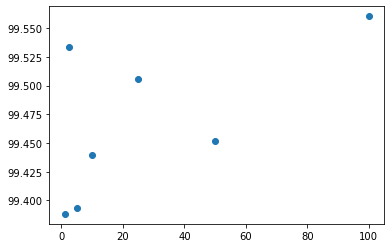

In [11]:
plot.scatter(dwell_time, d)

In [136]:
np.mean([11, 10, 11, 13, 11.5, 11.3, 10, 7])

10.6

In [137]:
np.mean([1, 2, 1, 1, 0.5, 0.7, 2, 5])

1.65

In [91]:
print(data)

                               File name  Number of Repeats  Dwell time (ms)  \
0   20211217__4_point_referenced_odmr_01               10.0             10.0   
1   20211217__4_point_referenced_odmr_02               10.0             10.0   
2   20211217__4_point_referenced_odmr_03               10.0             10.0   
3   20211217__4_point_referenced_odmr_04               10.0             10.0   
4   20211217__4_point_referenced_odmr_05               10.0             10.0   
..                                   ...                ...              ...   
65  20211217__4_point_referenced_odmr_66             1000.0             10.0   
66  20211217__4_point_referenced_odmr_67             1000.0             10.0   
67  20211217__4_point_referenced_odmr_68             1000.0             10.0   
68  20211217__4_point_referenced_odmr_69             1000.0             10.0   
69  20211217__4_point_referenced_odmr_70             1000.0             10.0   

    Total Counts recorded  Mean counts 

[[0.96578132 0.96696511]
 [0.95305372 0.96696511]
 [0.94918146 0.96696511]
 [0.95737803 0.96696511]]


TypeError: list indices must be integers or slices, not tuple

In [53]:
100* np.sqrt(8500)/8500

1.084652289093281